# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")


# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find duplicate rows based on Mouse ID and Timepoint
duplicate_rows = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]

# Extract unique Mouse IDs from the duplicate rows
duplicate_mouse_ids = duplicate_rows["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids_nonunique = duplicate_rows["Mouse ID"]
duplicate_mouse_ids_nonunique

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]


In [20]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data["Mouse ID"].nunique()
print(num_mice_cleaned)


248


## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_data = cleaned_data.groupby('Drug Regimen')

summary_stats = grouped_data['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)

#Calculate stats
mean_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_volume = grouped_data['Tumor Volume (mm3)'].var()
std_dev_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({
    "Mean": mean_volume,
    "Median": median_volume,
    "Variance": variance_volume,
    "Standard Deviation": std_dev_volume,
    "SEM": sem_volume
})

summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_table = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
)

summary_stats_table

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

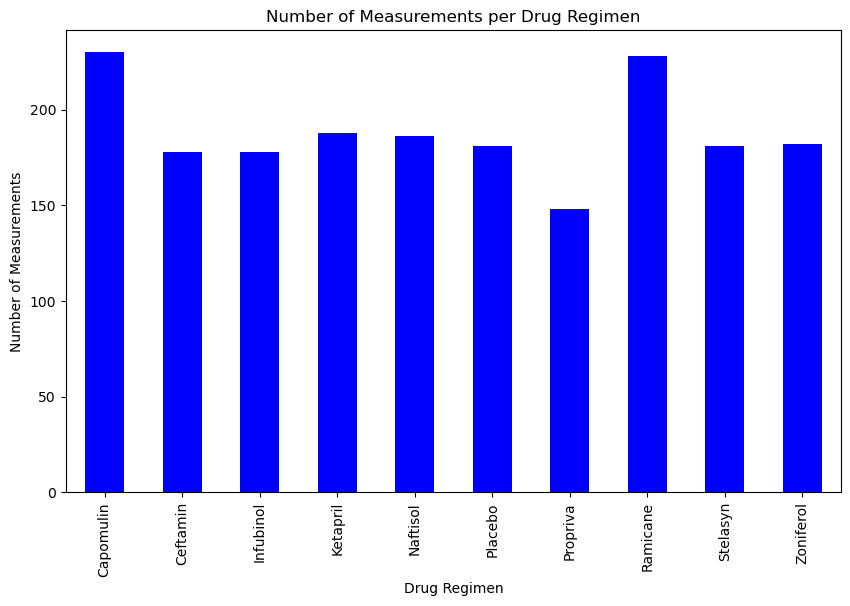

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
measurements_count = cleaned_data.groupby('Drug Regimen')['Mouse ID'].count()
measurements_count.plot(kind='bar', figsize=(10, 6), color='blue', title='Number of Measurements per Drug Regimen',
                        ylabel='Number of Measurements', xlabel='Drug Regimen')
# Display the plot
plt.show()

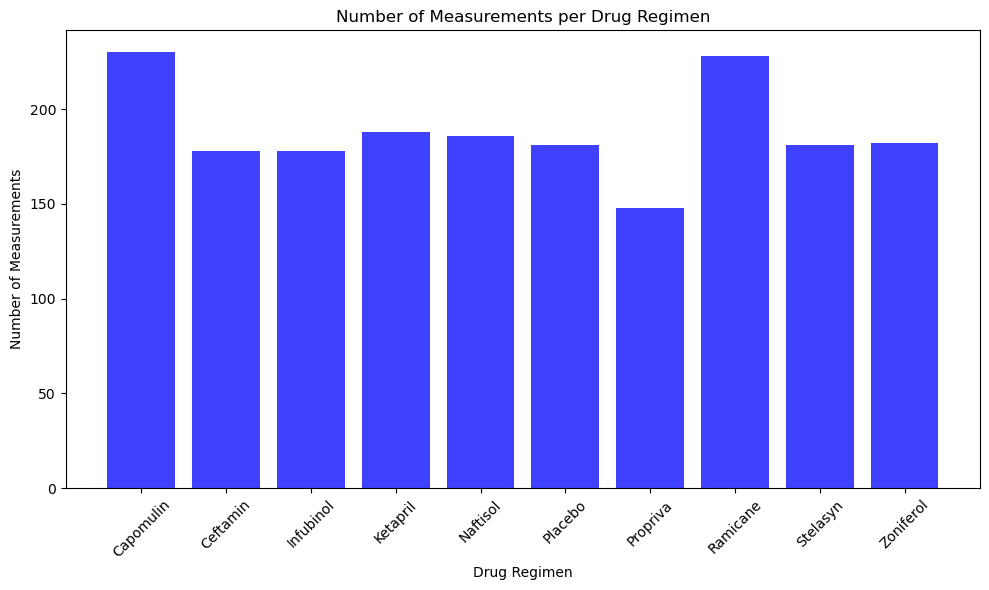

In [47]:
import matplotlib.pyplot as plt
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group the data by 'Drug Regimen' and count the number of measurements
measurements_count = cleaned_data.groupby('Drug Regimen')['Mouse ID'].count()

# Prepare data for plotting
regimens = measurements_count.index.tolist()  # X-values
counts = measurements_count.values  # Y-values

# Generate the bar plot
plt.figure(figsize=(10, 6))
plt.bar(regimens, counts, color='blue', alpha=0.75)

# Customize the plot
plt.title('Number of Measurements per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.xticks(rotation=45)  # Rotate drug regimen names for better readability

# Display the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


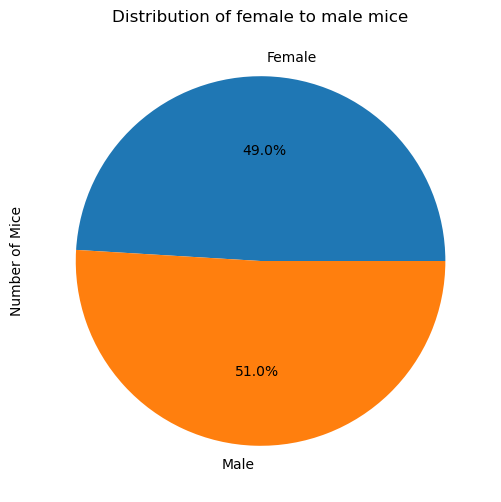

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
measurements_count = cleaned_data.groupby('Sex')['Mouse ID'].count()
measurements_count.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 6), title='Distribution of female to male mice',
                        ylabel='Number of Mice', xlabel='Sex')
plt.show()

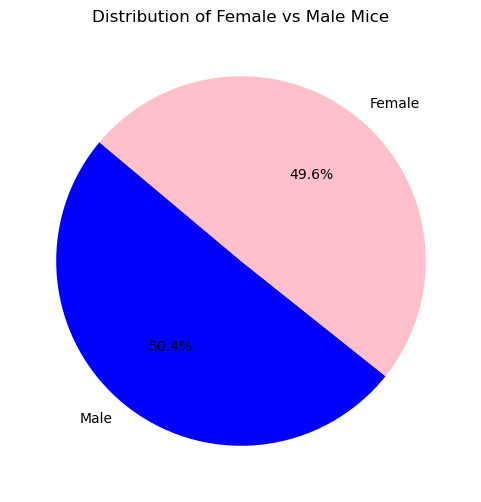

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Drop duplicates to ensure each mouse is counted only once
unique_mice = cleaned_data.drop_duplicates('Mouse ID')

# Count the number of females and males
sex_distribution = unique_mice['Sex'].value_counts()

# Prepare data for plotting
sizes = sex_distribution.values
labels = sex_distribution.index
colors = ['blue', 'pink']  # Customize as needed

# Generate the pie plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Customize the plot
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Step 1: Filter the DataFrame
filtered_df = cleaned_data[cleaned_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Step 2: Find the last timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_data = pd.merge(last_timepoints, filtered_df, on=['Mouse ID', 'Timepoint'], how='left')

# Display the first few rows to verify the merge
print(final_tumor_volume_data.head())

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a275         45     Ceftamin  Female          20          28   
3     a411         45     Ramicane    Male           3          22   
4     a444         45     Ramicane  Female          10          25   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           62.999356                 3  
3           38.407618                 1  
4           43.047543                 0  


In [91]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume_data_list = {}
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatment_list:
    tumor_volumes = final_tumor_volume_data[final_tumor_volume_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add to the dictionary for later use
    tumor_volume_data[treatment] = tumor_volumes
    
    # Calculate quartiles
    quartiles = tumor_volumes.quantile([.25, .5, .75])
    first_quartile = quartiles[0.25]
    third_quartile = quartiles[0.75]
    iqr = third_quartile - first_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = first_quartile - (1.5 * iqr)
    upper_bound = third_quartile + (1.5 * iqr)
    
    # Find any outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the results
    print(f"{treatment} regimen's potential outliers:")
    print(outliers)
    

Capomulin regimen's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane regimen's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol regimen's potential outliers:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin regimen's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)


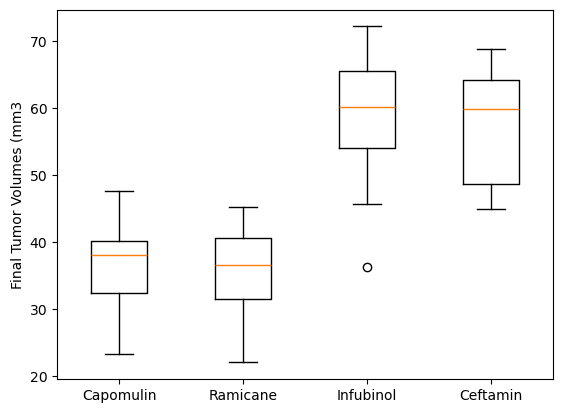

In [99]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = [tumor_volume_data[treatment] for treatment in treatment_groups]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volumes (mm3')
ax1.boxplot(tumor_volumes, labels=treatment_groups, showmeans=False, )
plt.show()

## Line and Scatter Plots

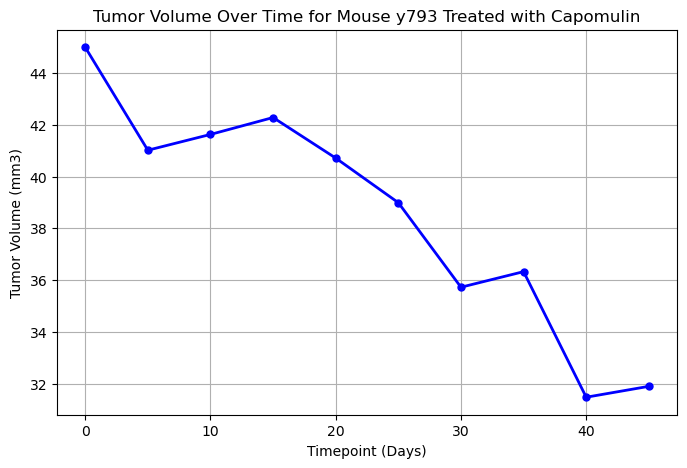

In [120]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Step 1: Choose a mouse ID from those treated with Capomulin
mouse_id = 'y793'

# Step 2: Filter the DataFrame for the selected mouse
mouse_data = cleaned_data[cleaned_data['Mouse ID'] == mouse_id]

# Step 3: Generate the line plot
plt.figure(figsize=(8, 5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-', linewidth=2, markersize=5)

# Customize the plot
plt.title(f'Tumor Volume Over Time for Mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)

# Display the plot
plt.show()

In [156]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#find average tumor volume for Capomulin Regimen

capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Step 2 & 3: Group by 'Weight (g)' and calculate the mean tumor volume
average_capomulin_volume = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

average_capomulin_volume

Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64

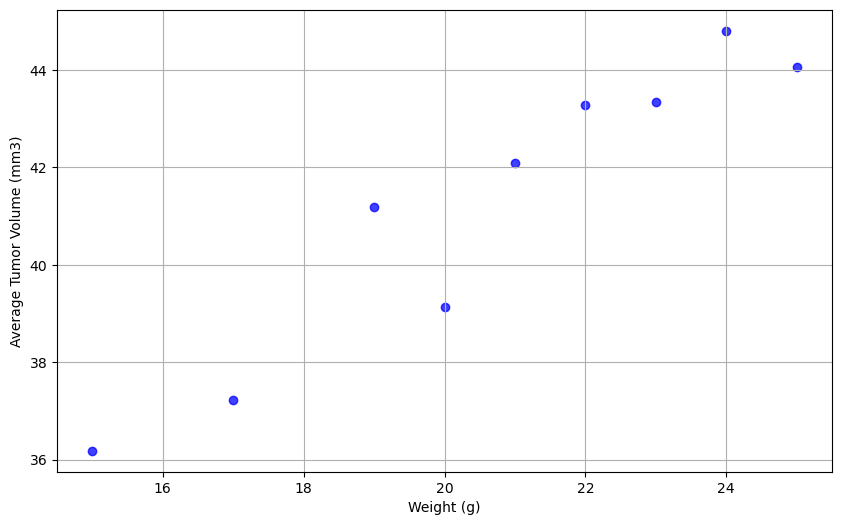

In [159]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_capomulin_volume_reset = average_capomulin_volume.reset_index()

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_capomulin_volume_reset['Weight (g)'], average_capomulin_volume_reset['Tumor Volume (mm3)'], color='blue', alpha=0.75)

# Customize the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

# Display the plot
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


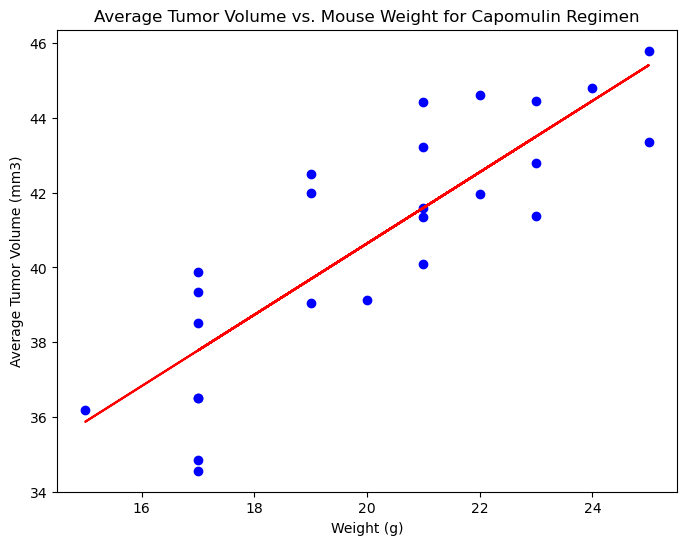

In [162]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#we've already grouped Capomulin data
import numpy as np
from scipy.stats import linregress
# Step 2: Group by Mouse ID and calculate average tumor volume
average_tumor_vol = capomulin_data.groupby('Mouse ID').agg(
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Weight=('Weight (g)', 'mean')  # Assuming weight doesn't change, mean weight is fine
).reset_index()

# Step 3: Calculate the Pearson correlation coefficient
correlation_coefficient = np.corrcoef(average_tumor_vol['Weight'], average_tumor_vol['Average_Tumor_Volume'])[0, 1]

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {correlation_coefficient:.2f}")

# Step 4: Fit a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(average_tumor_vol['Weight'], average_tumor_vol['Average_Tumor_Volume'])

# Use the slope and intercept to calculate the values for the linear regression line
average_tumor_vol['Regression_Volume'] = average_tumor_vol['Weight'] * slope + intercept

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(average_tumor_vol['Weight'], average_tumor_vol['Average_Tumor_Volume'], color='blue')
plt.plot(average_tumor_vol['Weight'], average_tumor_vol['Regression_Volume'], color='red')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()